44.04761904761905


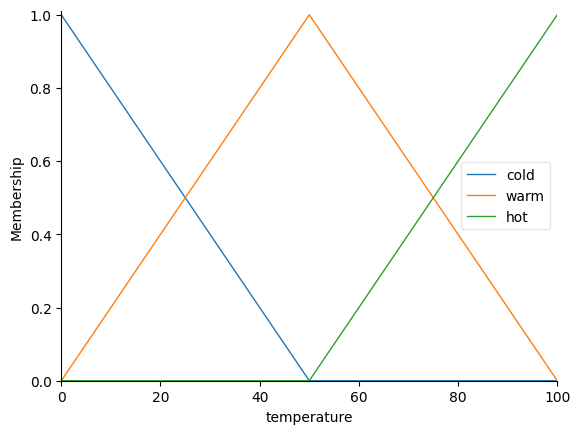

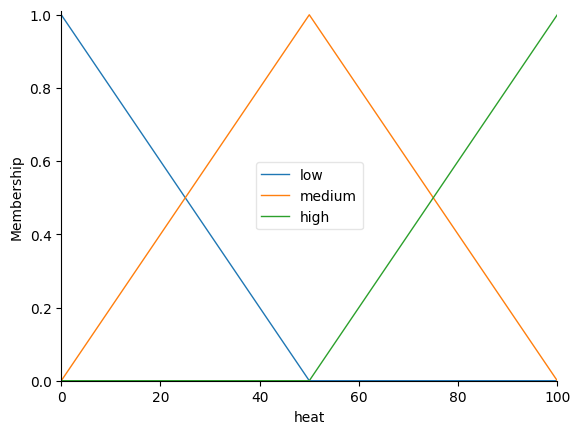

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the input and output variables
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
heat = ctrl.Consequent(np.arange(0, 101, 1), 'heat')

# Define the membership functions for the input variables
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['warm'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['hot'] = fuzz.trimf(temperature.universe, [50, 100, 100])

# Define the membership functions for the output variable
heat['low'] = fuzz.trimf(heat.universe, [0, 0, 50])
heat['medium'] = fuzz.trimf(heat.universe, [0, 50, 100])
heat['high'] = fuzz.trimf(heat.universe, [50, 100, 100])

# Define the rules for the fuzzy inference system
rule1 = ctrl.Rule(temperature['cold'], heat['high'])
rule2 = ctrl.Rule(temperature['warm'], heat['medium'])
rule3 = ctrl.Rule(temperature['hot'], heat['low'])

# Create the fuzzy inference system
temperature_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
temperature_simulation = ctrl.ControlSystemSimulation(temperature_ctrl)

# Input a temperature value and compute the output
temperature_simulation.input['temperature'] = 75
temperature_simulation.compute()

# Print the output
print(temperature_simulation.output['heat'])

# Visualize the fuzzy membership functions
temperature.view()
heat.view()
